<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-cardonasebastian/blob/main/Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Importando librerias.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PowerTransformer


###Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 


In [21]:
#Descargando los datos de un sitio externo
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


###Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [22]:
df.shape

(30000, 25)

In [23]:
df.columns


Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [24]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [25]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [27]:
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [28]:
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [29]:
df.isna().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [38]:
#Se eliminan los datos na.
df.dropna(inplace=True)

In [39]:
#se confirma que no se tenga datos null.
df.isna().any()

ID     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

###Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [42]:
df.describe(include='all')

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


###Realiza el conteo de las variables categóricas

In [50]:
categoricas = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
nuevo_df_cat = df[categoricas]
nuevo_df_cat.count()



X2     29958
X3     29958
X4     29958
X6     29958
X7     29958
X8     29958
X9     29958
X10    29958
X11    29958
dtype: int64

In [51]:
nuevo_df_cat.head()

,X2,X3,X4,X6,X7,X8,X9,X10,X11
0,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
1,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0
2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0


###Escala los datos, si consideras necesario

In [54]:
categoricas = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
numericas = ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'] 
salida = ['Y']

cat_df = df[categoricas]
X = df[numericas]
y = df['Y']


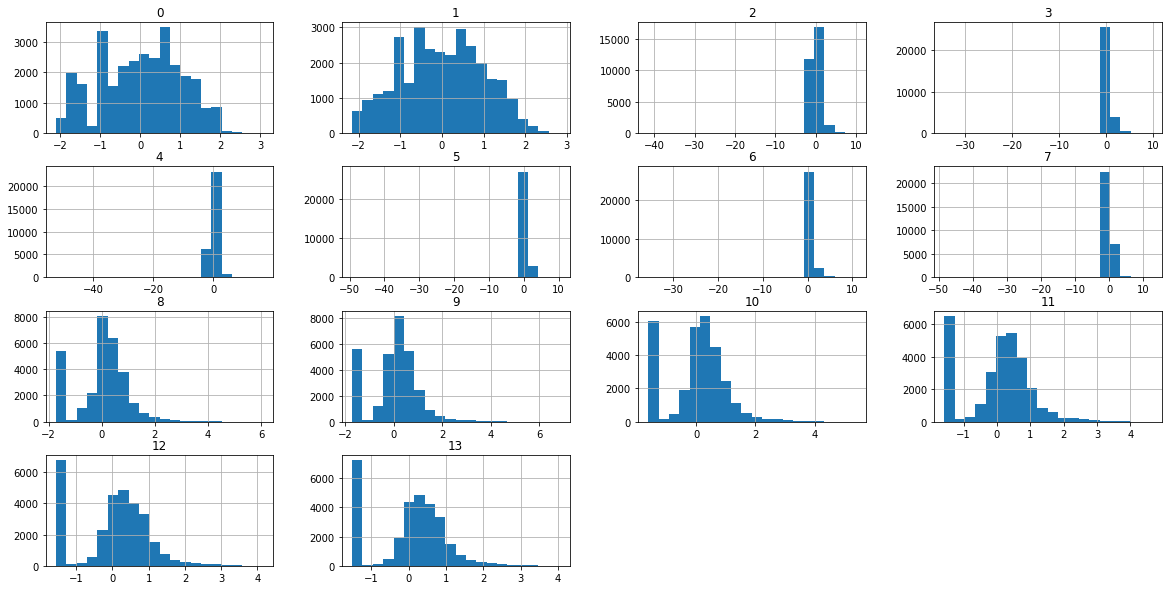

In [55]:
pt = PowerTransformer(standardize=True)
pt.fit(X)
X_scaled = pt.transform(X)
_ = pd.DataFrame(X_scaled).hist(figsize=(20,10), bins=20)


###Reduce las dimensiones con PCA, si consideras necesario.

In [56]:
pca = PCA()
X_new = pca.fit_transform(X_scaled)

###Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

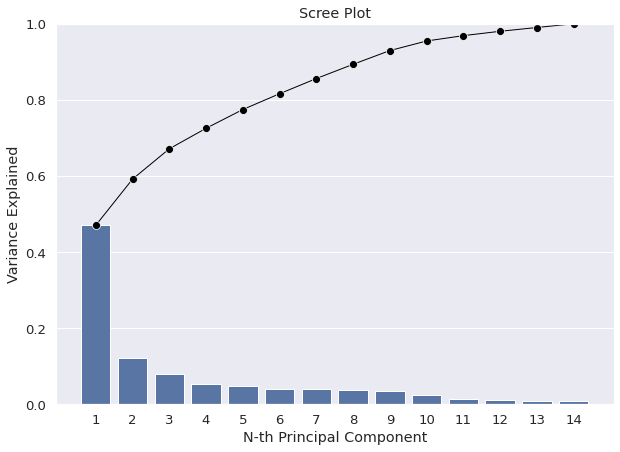

In [58]:


pc_components = np.arange(pca.n_components_) + 1
  #PC_components

_ = sns.set(font_scale = 1.2)

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = pc_components, 
                  y = pca.explained_variance_ratio_, 
                  color = 'b'
                  )

_ = sns.lineplot(x = pc_components-1, 
                  y = np.cumsum(pca.explained_variance_ratio_), 
                  color = 'black', 
                  linestyle = '-', 
                  linewidth = 1, 
                  marker = 'o', 
                  markersize = 8,                                  
                  )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [59]:
pcsSummary = pd.DataFrame({'Desviación Estándar': np.sqrt(pca.explained_variance_),
                          'Proporción de la Varianza': pca.explained_variance_ratio_,
                          'Proporción Acumulada': np.cumsum(pca.explained_variance_ratio_)
                          }
                          )
pcsSummary

,Desviación Estándar,Proporción de la Varianza,Proporción Acumulada
0,2.566200,0.470369,0.470369
1,1.303198,0.121305,0.591674
2,1.056514,0.079727,0.671401
3,0.868650,0.053895,0.725296
4,0.831180,0.049346,0.774642
5,0.762203,0.041495,0.816137
6,0.747588,0.039919,0.856056
7,0.723821,0.037421,0.893477
8,0.710963,0.036104,0.929581
9,0.593828,0.025187,0.954768


### Indica la importancia de las variables en cada componente

In [62]:
print("PCA", abs( pca.components_[0]))

PCA [0.14748557 0.03085987 0.31806792 0.3292578  0.33524759 0.33742204
 0.33620207 0.32702721 0.22567809 0.22993717 0.23500412 0.23729339
 0.23360899 0.22712246]


In [63]:
val_importante = np.argsort(abs(pca.components_[0]))[::-1]
val_importante
print(val_importante)

for i in val_importante:
  print("Variable:", numericas[i],"=", pca.components_[0][i])

[ 5  6  4  3  7  2 11 10 12  9 13  8  0  1]
Variable: X15 = 0.33742203785692537
Variable: X16 = 0.3362020697726398
Variable: X14 = 0.3352475937133842
Variable: X13 = 0.3292577957899244
Variable: X17 = 0.3270272148683121
Variable: X12 = 0.3180679196869982
Variable: X21 = 0.23729339126773102
Variable: X20 = 0.2350041231292927
Variable: X22 = 0.2336089942744509
Variable: X19 = 0.22993716712823886
Variable: X23 = 0.22712245726159633
Variable: X18 = 0.2256780910405008
Variable: X1 = 0.1474855688136238
Variable: X5 = 0.03085987418935443


Las varibles con mayor importancia corresponden: X15 con (0.3374) , X16 con (0.3362), X14 con (0.3352), X13 con (0.3292) dado que son las mas altas que podemos observar al momento de imprimiarlas. 

###Elabora los histogramas de los atributos para visualizar su distribución

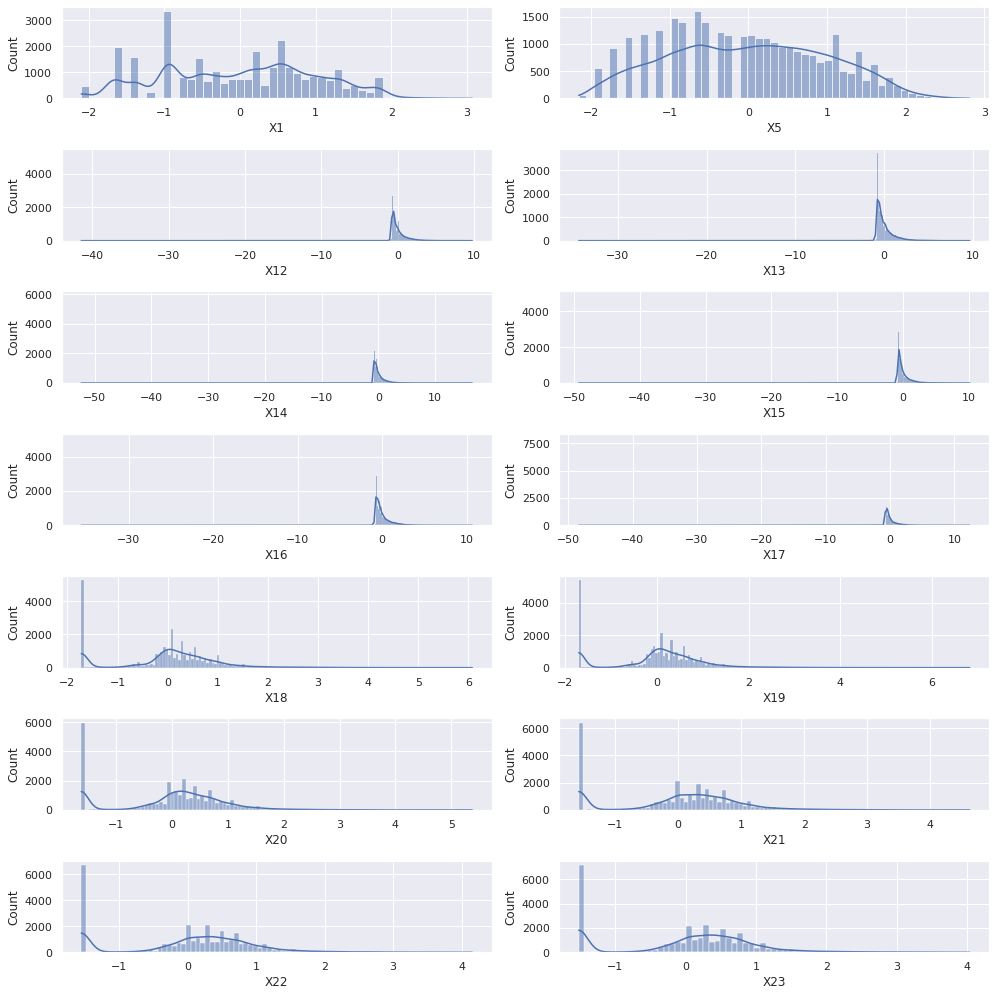

In [64]:
XScaled_df = pd.DataFrame (X_scaled, columns=numericas)

fig, axes = plt.subplots(7, 2, figsize=(14, 14))
sns.set({'font.size':50})
sns.set(font_scale=1)
for i, col in enumerate(XScaled_df.columns):
  plt.subplot(7, 2, i+1)
  plt.xlabel(col)
  sns.histplot(XScaled_df[col],kde=True)

plt.tight_layout()
plt.show()


###Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.